In [1]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

duration = 5000#0
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1

def write(name,obs):
    f=open(name,'w')
    data = np.array(obs.data()).T
    np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
    f.close()        
    print('saving into',name)        

def singlerun(rm,D,solver='ode',intrinsic=False):   
    print(solver)
    V = L**3 
    keff = k0/Ca/Cb
    Nb=100
    Na=500
    print('Nb',Nb,'Na',Na)
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    dt = (2*rm)**2 / (6*D)
    M = max(int(min(cbrt(Na + Nb), L / (2 * rm))), 3)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm  }
        B | {'D': D, 'radius':rm  }

    with reaction_rules():
        ~A > A | k0
        A + B >B | (ka if intrinsic else keff)
    m = get_model()
    w = egfrd.EGFRDWorld(Real3(L,L,L),Integer3(M,M,M))
    w.bind_to(m)
    w.add_molecules(Species('B'),Nb)
    w.add_molecules(Species('A'),Na)
    sim = egfrd.EGFRDSimulator(w)    
    print('rm={:.3},D={:.3}'.format(rm,D))
    print('kon={:.3},ka={:.3},kd={:.3},keff={:.3},kfactor={:.3},V={:.3}'.format(k0,ka,kd,keff,ka/kd,V))
    obs = FixedIntervalNumberObserver(dt, ['A'])
    sim.run(duration,obs)
    data = np.array(obs.data()).T
    print('mean [A]',np.mean(data[1][50:])/V)   
    write('/home/chew/outputdata/sturrock_bd_{}_rm{:.3}_D{:.3}_L{:.3}b_dur{}'.format('egfrd',rm,D,L,duration),obs)
    return obs

for job in [[0.05,0.1]]:#[[0.02,0.02],[0.05,0.01]]:#[0.05,0.1],[0.05,0.01]]:
    obs=singlerun(job[0],job[1],'egfrd',True)
    #obs=singlerun(job[0],job[1],'G',False,simrun)

    

egfrd
Nb 100 Na 500
rm=0.05,D=0.1
kon=0.1,ka=0.0217,kd=0.251,keff=0.02,kfactor=0.0865,V=1e+02
mean [A] 4.98432423963
saving into /home/chew/outputdata/sturrock_bd_egfrd_rm0.05_D0.1_L4.64b_dur5000


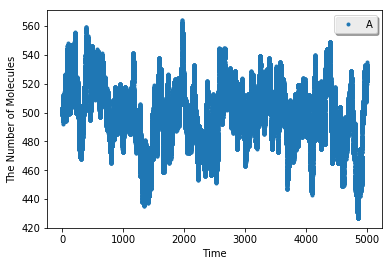

In [2]:
#viz.plot_number_observer(obs4,'r.',obs2,'g.',obs3,'k-',obs5,'y-',obs6,'c-')
viz.plot_number_observer(obs,'r.')

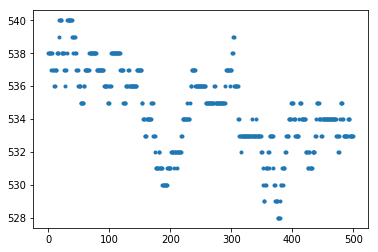

In [18]:
data = np.array(obs.data()).T
plt.plot(data[1][-500:],'.')

In [5]:
np.array(obs.data()).T[1][-1]/L**3

5.0606000000000018

In [ ]:
5.265